In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import r2_score
%matplotlib notebook

# Question 4

In [2]:
path = r"C:\Users\parik\Documents\Data sets\Time series course\sim_2.csv"
df = pd.read_csv(path,index_col=0)
df.head()

,Y1,Y2,Y3
OBS,,,
1,0.60805,3.96768,0.04856
2,-0.29348,-2.23051,0.14200
3,-0.68832,1.69602,-0.10089
4,-0.86596,-1.61072,-0.50346
5,0.66890,3.79400,-0.50044


### a. Plot the sequence against time. Does the series appear to be stationary?

<IPython.core.display.Javascript object>


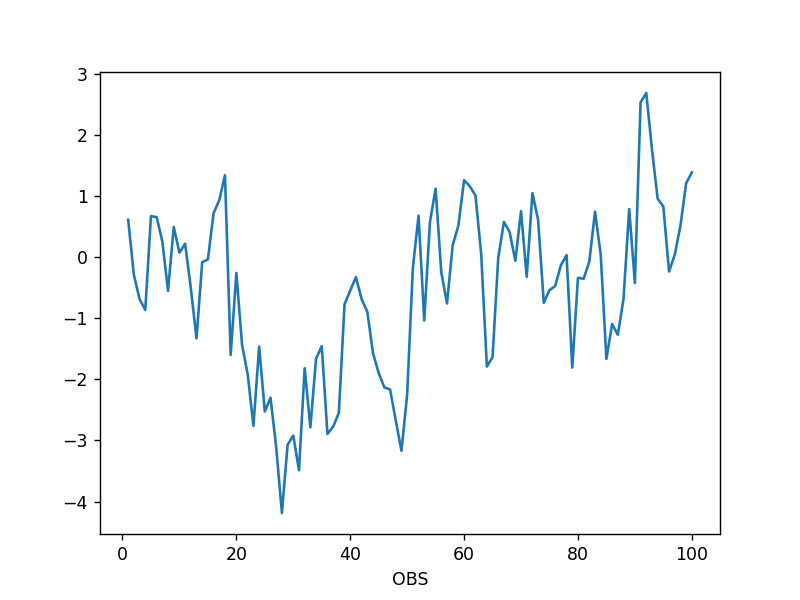

<AxesSubplot:xlabel='OBS'>

In [3]:
df['Y1'].plot()

The series appears to be stationary with constant mean and variance

### b. Use the data to verify the results given in Table 2.2

In [4]:
endog = df['Y1'].values
model = ARIMA(endog, order=(1, 0, 0))
# res = model.fit()
res = model.fit_constrained({'const': 0})
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -134.392
Date:                Thu, 24 Feb 2022   AIC                            272.783
Time:                        12:47:31   BIC                            277.993
Sample:                             0   HQIC                           274.892
                                - 100                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const (fixed)          0        nan        nan        nan         nan         nan
ar.L1             0.7840      0.063     12.414      0.000       0.660       0.908
sigma2            0.8525      0.115     

### c. Estimate the series as an AR(2) process without an intercept. (2 points)

In [5]:
model = ARIMA(endog, order=(1, 0, 12), enforce_invertibility=False)
# res = model.fit()
res = model.fit_constrained({'const': 0,
                             'ma.L1' :0, 
                             'ma.L2' :0, 
                             'ma.L3' :0, 
                             'ma.L4' :0, 
                             'ma.L5' :0, 
                             'ma.L6' :0, 
                             'ma.L7' :0, 
                             'ma.L8' :0, 
                             'ma.L9' :0, 
                             'ma.L10' :0, 
                             'ma.L11' :0})
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                ARIMA(1, 0, 12)   Log Likelihood                -134.372
Date:                Thu, 24 Feb 2022   AIC                            274.744
Time:                        12:47:31   BIC                            282.560
Sample:                             0   HQIC                           277.907
                                - 100                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const (fixed)           0        nan        nan        nan         nan         nan
ar.L1              0.7874      0.063     12.586      0.000       0.665       0.910
ma.L1 (fixed)           0        nan

###  d. Estimate the series as an ARMA(1, 1) process without an intercept. (2 points)

In [6]:
model = ARIMA(endog, order=(2, 0, 0))
# res = model.fit()
res = model.fit_constrained({'const': 0})
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -133.847
Date:                Thu, 24 Feb 2022   AIC                            273.694
Time:                        12:47:32   BIC                            281.510
Sample:                             0   HQIC                           276.857
                                - 100                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const (fixed)          0        nan        nan        nan         nan         nan
ar.L1             0.7016      0.108      6.524      0.000       0.491       0.912
ar.L2             0.1039      0.103     

In [7]:
model = ARIMA(endog, order=(1, 0, 1))
# res = model.fit()
res = model.fit_constrained({'const': 0})
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -133.793
Date:                Thu, 24 Feb 2022   AIC                            273.585
Time:                        12:47:32   BIC                            281.401
Sample:                             0   HQIC                           276.748
                                - 100                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const (fixed)          0        nan        nan        nan         nan         nan
ar.L1             0.8384      0.067     12.605      0.000       0.708       0.969
ma.L1            -0.1463      0.134     

min aic or max log likelihood or fstat from joint null

### ACF and PACF

<IPython.core.display.Javascript object>


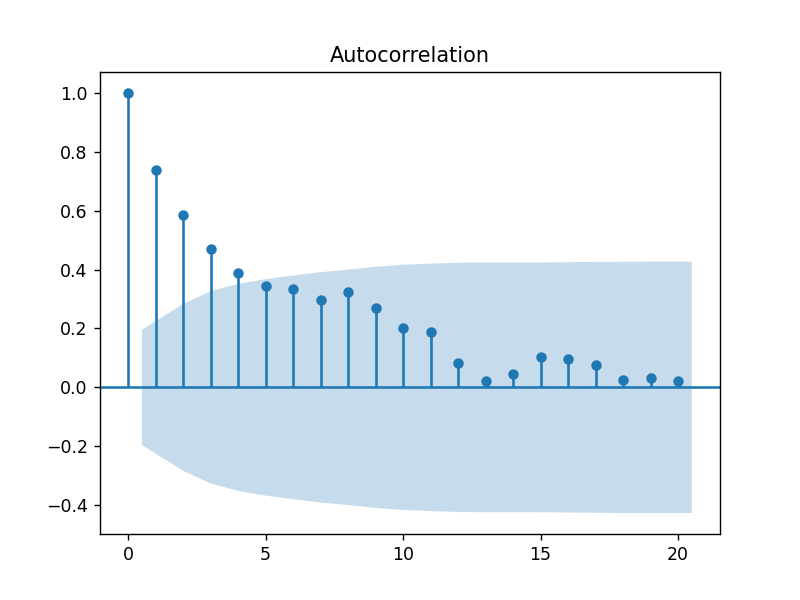

In [8]:
acf = plot_acf(endog)

<IPython.core.display.Javascript object>


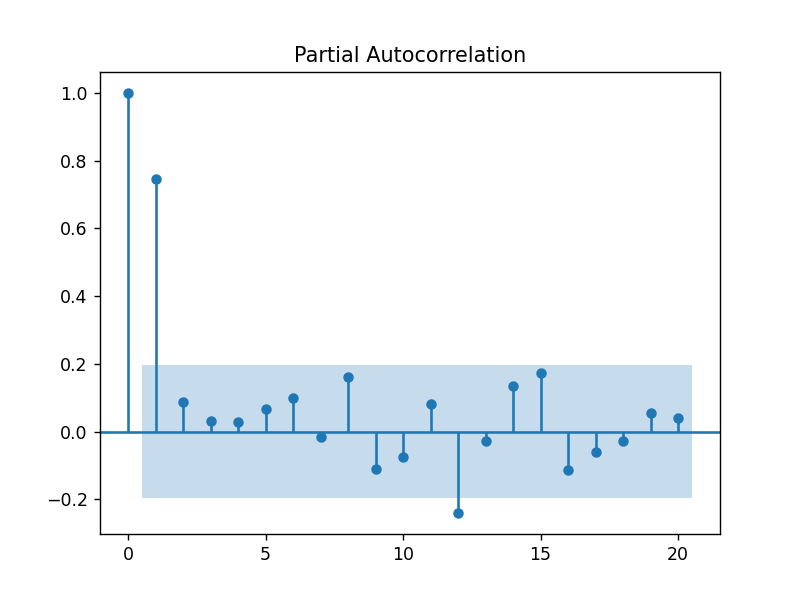

In [9]:
pacf = plot_pacf(endog)

# Question 5

### Loading the Dataset

In [10]:
filename = r"C:\Users\parik\Documents\Data sets\Time series course\quarterly.xls"
df = pd.read_excel(filename)
df.head()

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1,1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
2,1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
3,1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
4,1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073


### Creating 'lyt' as first difference of log(ppinsa)

<IPython.core.display.Javascript object>


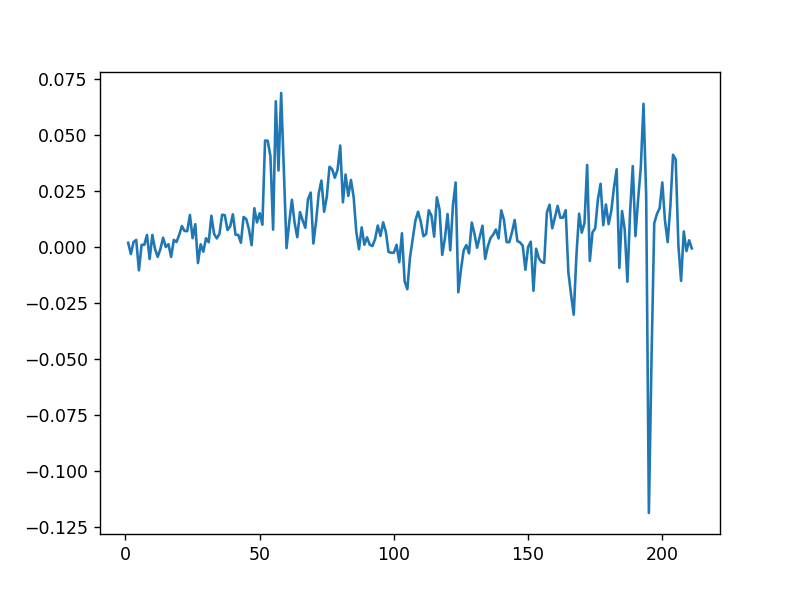

In [11]:
df['lyt'] = np.log(df['PPINSA']).diff(1)
plt.figure()
lyt = df['lyt'].plot()
endog = df['lyt'].values

<IPython.core.display.Javascript object>


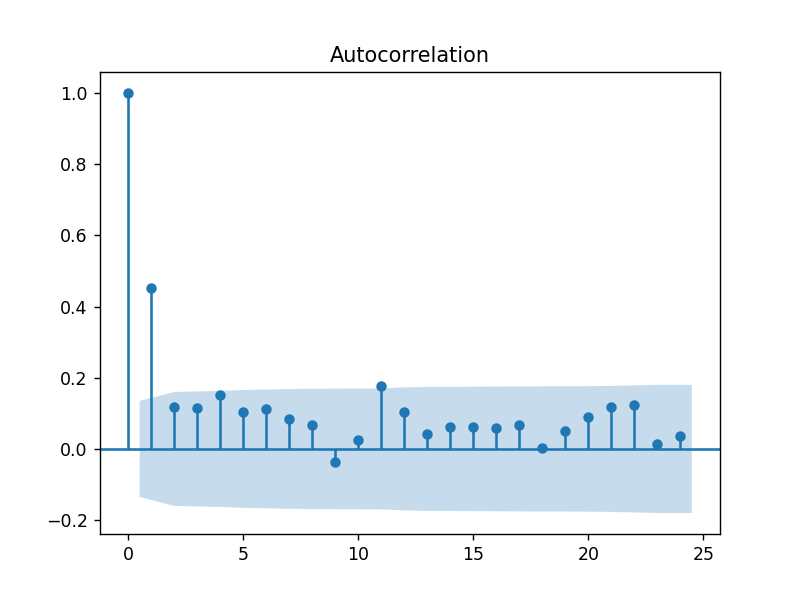

In [12]:
acf = plot_acf(endog[1:])

<IPython.core.display.Javascript object>


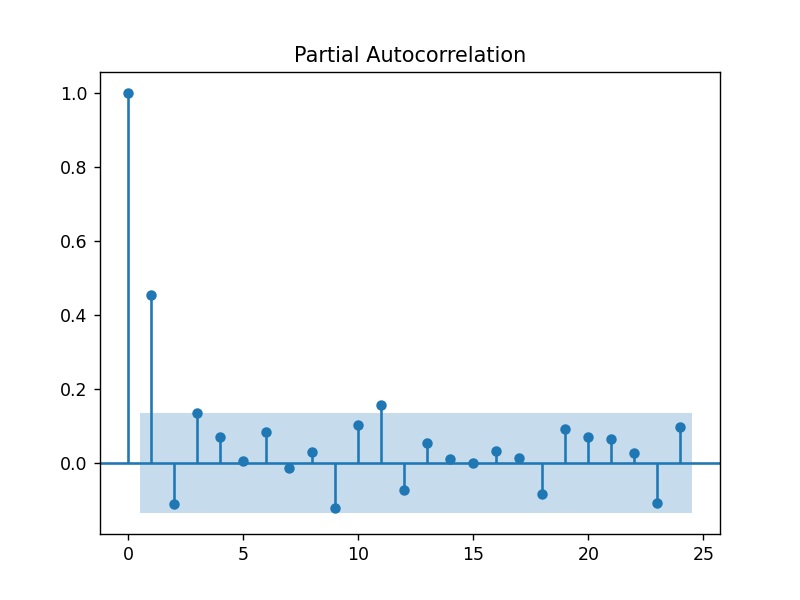

In [13]:
pacf = plot_pacf(endog[1:])

## Fitting the Models

### Best model for in-sample fit

In [24]:
### AR(|1,3|)
model = ARIMA(endog, order=(3, 0, 0),enforce_stationarity=False)
res = model.fit_constrained({'ar.L2': 0})
ar_13 = res.aic
print("AIC of AR(|1,3|): ",ar_13)

### AR(3)
model = ARIMA(endog[1:], order=(3, 0, 0))
res = model.fit()
ar_3 = res.aic
print("AIC of AR(3):     ",ar_3)

### ARMA(1,1)
model = ARIMA(endog[2:], order=(1, 0, 1))
res = model.fit()
arma_1_1 = res.aic
print("AIC of ARMA(1,1): ",arma_1_1)


#Best in sample
print("AR(|1,3|) model is the best in-sample fit: " ,ar_13 == min(ar_13,ar_3,arma_1_1))

AIC of AR(|1,3|):  -1134.5764302998218
AIC of AR(3):      -1151.2207783082931
AIC of ARMA(1,1):  -1144.3060823629362
AR(|1,3|) model is the best in-sample fit:  False


### Best out-sample fit

In [15]:
train_size = int(len(endog)*0.75)
train = endog[:train_size]
test = endog[train_size:]
start_index = len(train)
end_index = len(endog)-1

### AR(|1,3|)
model = ARIMA(endog, order=(3, 0, 0),enforce_stationarity=False)
res = model.fit_constrained({'ar.L2': 0})
ar_13 = res.params[:-1]
forecast1 = res.predict(start=start_index, end=end_index)
r2 = r2_score(test, forecast1)
print("R squared of out of sample AR(|1,3|): ",r2)


### ARMA(1,1)
model = ARIMA(endog[2:], order=(1, 0, 1))
res = model.fit()
arma_1_1 = res.params[:-1]
forecast2 = res.predict(start=start_index, end=end_index)
r2 = r2_score(test, forecast2)
print("R squared of out of sample ARMA(1,1): ",r2)

R squared of out of sample AR(|1,3|):  0.09869584847058599
R squared of out of sample ARMA(1,1):  0.1714366359128947


<IPython.core.display.Javascript object>


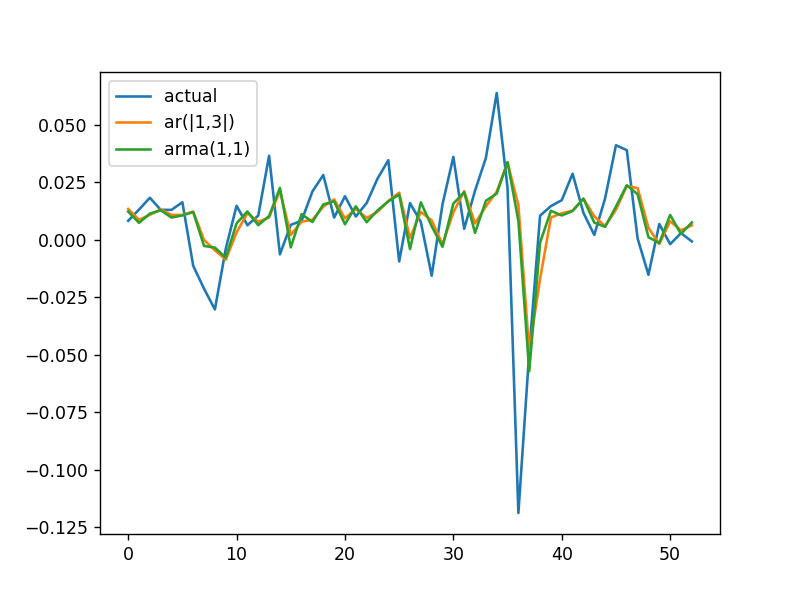

In [16]:
plt.figure()
plt.plot(test)
plt.plot(forecast1)
plt.plot(forecast2)
plt.legend(['actual','ar(|1,3|)','arma(1,1)'])

In [17]:
### AR(|1,3|)
model = ARIMA(endog, order=(3, 0, 0),enforce_stationarity=False)
res = model.fit_constrained({'ar.L2': 0})
ar_13 = res.params[-1]
forecast = res.predict(start=start_index, end=end_index)
r2 = r2_score(test, forecast)
print("R squared of out sample AR(|1,3|): ",r2)
print("R squared of in sample AR(|1,3|):  ",ar_13)


## discard 10
### AR(5)
model = ARIMA(endog, order=(5, 0, 0))
res = model.fit()
ar_3 = res.params[-1]
forecast1 = res.predict(start=start_index, end=end_index)
r2 = r2_score(test, forecast1)
print("R squared of out of sample AR(5): ",r2)
print("R squared of in sample AR(5):     ",ar_3)

### ARMA(2,1)
model = ARIMA(endog, order=(2, 0, 1))
res = model.fit()
arma_1_1 = res.params[-1]
forecast2 = res.predict(start=start_index, end=end_index)
r2 = r2_score(test, forecast2)
print("R squared of out of sample ARMA(2,1): ",r2)
print("R squared of in sample ARMA(2,1):     ",arma_1_1)


#Best in sample
print("AR(|1,3|) model is the best in-sample fit: " ,(ar_13>ar_3) & (ar_13 > arma_1_1))
print("ARMA(2,1) has best out sample fit")

R squared of out sample AR(|1,3|):  0.09869584847058599
R squared of in sample AR(|1,3|):   0.0002470969855065697
R squared of out of sample AR(5):  0.14725468056470858
R squared of in sample AR(5):      0.00023685938827977326


C:\Users\parik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\parik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


R squared of out of sample ARMA(2,1):  0.16973923194697682
R squared of in sample ARMA(2,1):      0.00024067981066914012
AR(|1,3|) model is the best in-sample fit:  True
ARMA(2,1) has best out sample fit


<IPython.core.display.Javascript object>


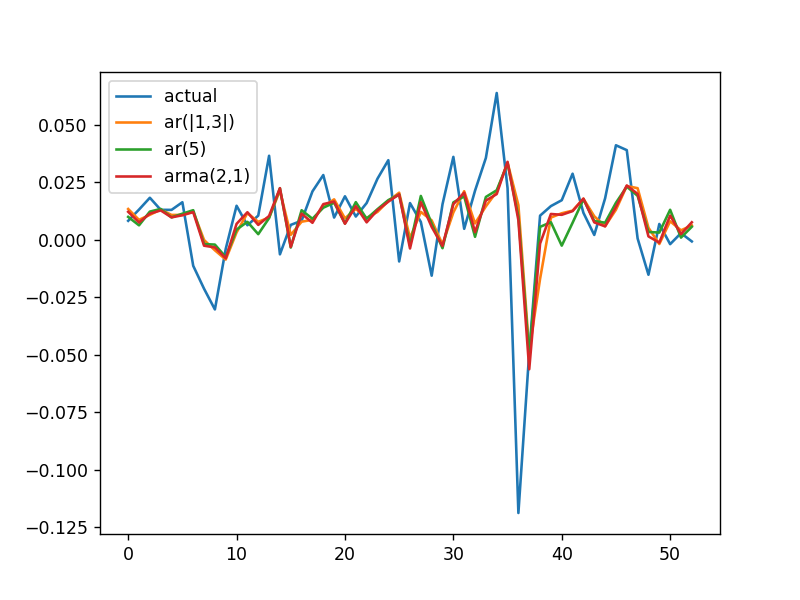

In [18]:
plt.figure()
plt.plot(test)
plt.plot(forecast)
plt.plot(forecast1)
plt.plot(forecast2)
plt.legend(['actual','ar(|1,3|)','ar(5)','arma(2,1)'])